# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [3]:
#Describe 
transactions.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


In [4]:
#Info

transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrg   1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB


In [5]:
#null values
transactions.isna().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
#Remove duplicates
transactions.drop_duplicates()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0
...,...,...,...,...,...,...,...,...,...,...
999995,PAYMENT,13606.07,C768838592,114122.11,100516.04,M1593119373,0.00,0.00,0,0
999996,PAYMENT,9139.61,C1912748675,0.00,0.00,M842968564,0.00,0.00,0,0
999997,CASH_OUT,153650.41,C1494179549,50677.00,0.00,C1560012502,0.00,380368.36,0,0
999998,CASH_OUT,163810.52,C116856975,0.00,0.00,C1348490647,357850.15,521660.67,0,0


In [7]:
#dropping columns that are irrelevent
transactions = transactions.drop(columns=["nameOrig", "nameDest"])
transactions

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,36730.24,35747.15,0.00,0.00,0,0
1,PAYMENT,55215.25,99414.00,44198.75,0.00,0.00,0,0
2,CASH_IN,220986.01,7773074.97,7994060.98,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,0.00,0.00,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,0.00,0.00,625317.04,693307.19,0,0
...,...,...,...,...,...,...,...,...
999995,PAYMENT,13606.07,114122.11,100516.04,0.00,0.00,0,0
999996,PAYMENT,9139.61,0.00,0.00,0.00,0.00,0,0
999997,CASH_OUT,153650.41,50677.00,0.00,0.00,380368.36,0,0
999998,CASH_OUT,163810.52,0.00,0.00,357850.15,521660.67,0,0


In [8]:
#Value_counts on targets
print(f"Value counts of isFraud {transactions["isFraud"].value_counts()}")
print(f"Value counts of isFraud percentage {transactions["isFraud"].value_counts(normalize=True)}")

print(f"Value counts of isFlaggedFraud {transactions["isFlaggedFraud"].value_counts()}")
print(f"Value counts of isFlaggedFraud percentage {transactions["isFlaggedFraud"].value_counts(normalize=True)}")

#class imbalance because there are a lot more 0s than 1s

Value counts of isFraud isFraud
0    998703
1      1297
Name: count, dtype: int64
Value counts of isFraud percentage isFraud
0    0.998703
1    0.001297
Name: proportion, dtype: float64
Value counts of isFlaggedFraud isFlaggedFraud
0    999999
1         1
Name: count, dtype: int64
Value counts of isFlaggedFraud percentage isFlaggedFraud
0    0.999999
1    0.000001
Name: proportion, dtype: float64


## Univarite Analysis

### Q1
Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.


In [9]:
transactions


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,36730.24,35747.15,0.00,0.00,0,0
1,PAYMENT,55215.25,99414.00,44198.75,0.00,0.00,0,0
2,CASH_IN,220986.01,7773074.97,7994060.98,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,0.00,0.00,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,0.00,0.00,625317.04,693307.19,0,0
...,...,...,...,...,...,...,...,...
999995,PAYMENT,13606.07,114122.11,100516.04,0.00,0.00,0,0
999996,PAYMENT,9139.61,0.00,0.00,0.00,0.00,0,0
999997,CASH_OUT,153650.41,50677.00,0.00,0.00,380368.36,0,0
999998,CASH_OUT,163810.52,0.00,0.00,357850.15,521660.67,0,0


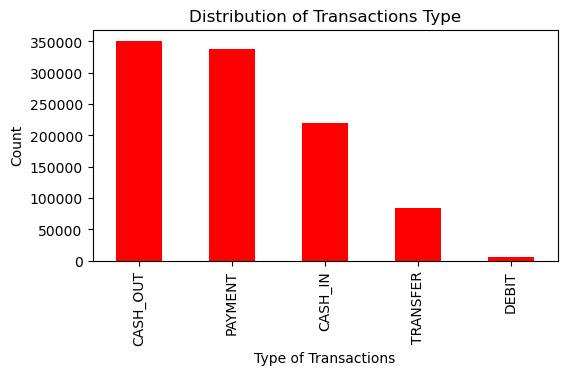

In [10]:
#Distribution of the type of bank transactions 
#Type: The type of transaction

plt.figure(figsize=(6,3))
trans_type = transactions['type'].value_counts()
trans_type.plot(kind = 'bar', color= "red")
plt.title("Distribution of Transactions Type")
plt.xlabel("Type of Transactions")
plt.ylabel("Count")
plt.tight_layout
plt.show()


<Axes: xlabel='isFraud'>

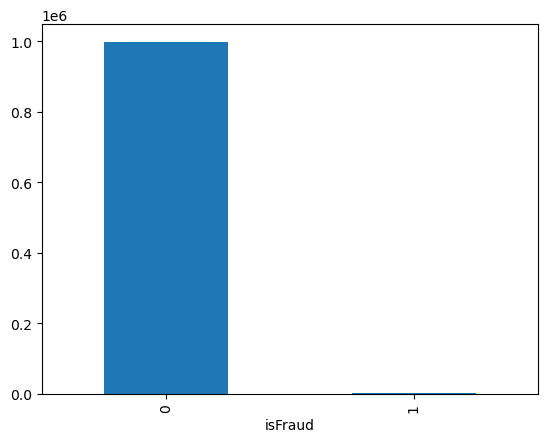

In [ ]:
transactions["isFraud"].value_counts().plot.bar()

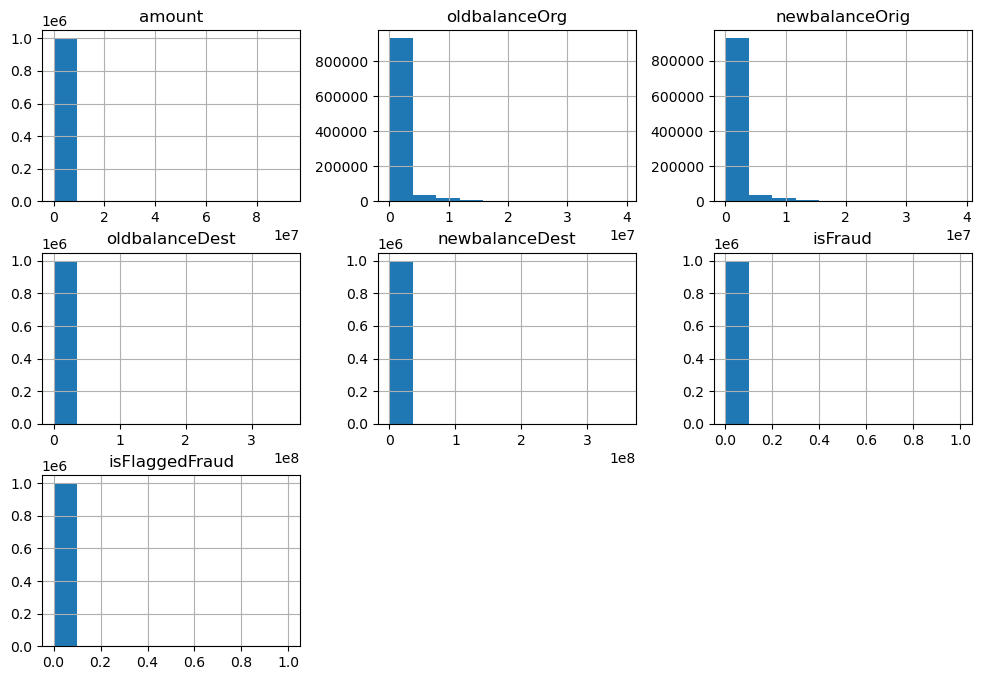

In [11]:
#This creates a histogram of all the number columns at once 
num_cols = transactions.select_dtypes(include = ['int64', 'float64']).columns

transactions[num_cols].hist(figsize=(12,8))
plt.tight_layout
plt.show()

#We see that it is rightly skewed and that it is hard to read the data

/var/folders/q6/zhddk2010yzdxh2b2q3wtwdw0000gp/T/ipykernel_22202/1182499755.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  trans_log = transactions_numeric.applymap(


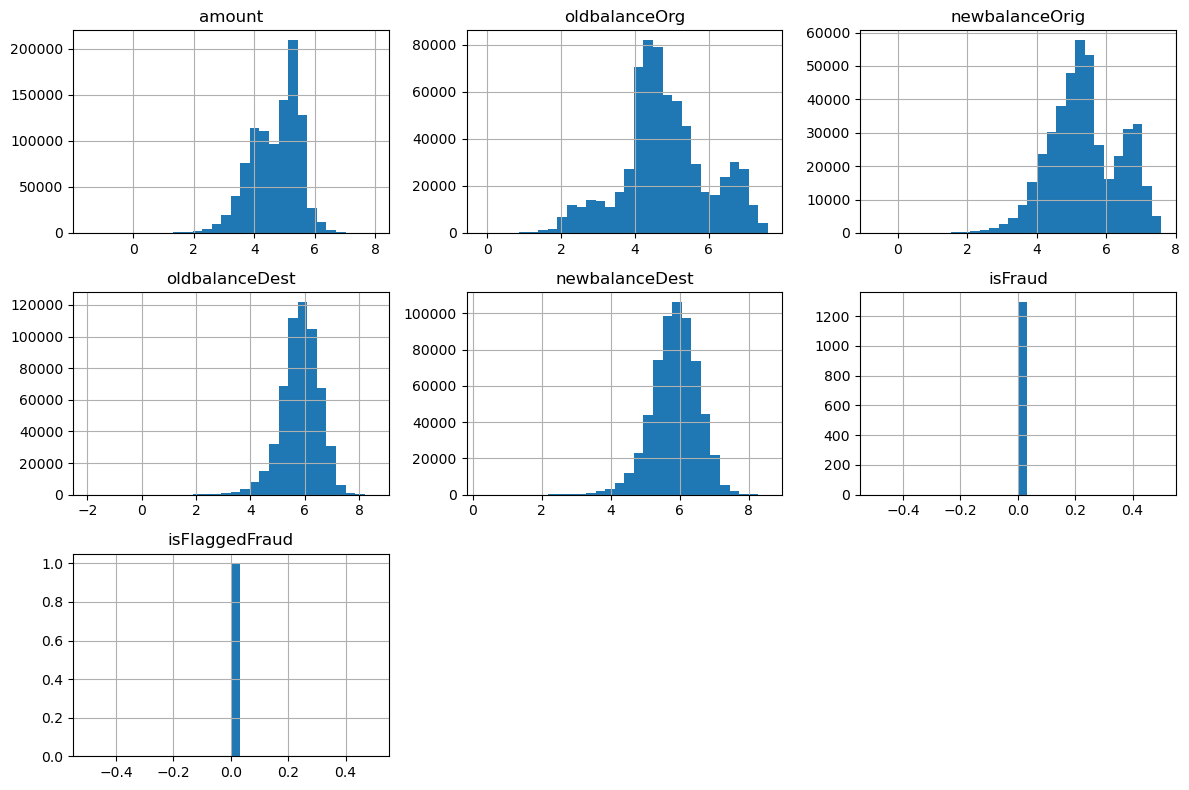

In [12]:
#Used log transformations to get a gaussian model/ normal distribution 

#num_cols = transactions.select_dtypes(include=['int64', 'float64']).columns
transactions_numeric = transactions[num_cols]

# Log10 transform 
trans_log = transactions_numeric.applymap(
    lambda x: np.log10(x) if x > 0 else np.nan
)

# Plot histograms
trans_log.hist(figsize=(12,8), bins = 30,)

plt.tight_layout()
plt.show()

In [13]:
#descriptions of the transaction with log transformation
trans_log.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,999997.000000,669141.000000,433144.000000,575159.000000,616545.000000,1297.0,1.0
mean,4.707057,4.809391,5.385653,5.833329,5.867835,0.0,0.0
std,0.788457,1.190131,1.005194,0.687849,0.655470,0.0,NaN
min,-1.522879,-0.173925,-0.677781,-2.000000,0.240549,0.0,0.0
25%,4.126115,4.135610,4.705625,5.433188,5.466144,0.0,0.0
50%,4.871779,4.710566,5.316893,5.867241,5.895166,0.0,0.0
75%,5.318774,5.478858,6.175336,6.300010,6.315248,0.0,0.0
max,7.965886,7.597531,7.590390,8.550905,8.551469,0.0,0.0


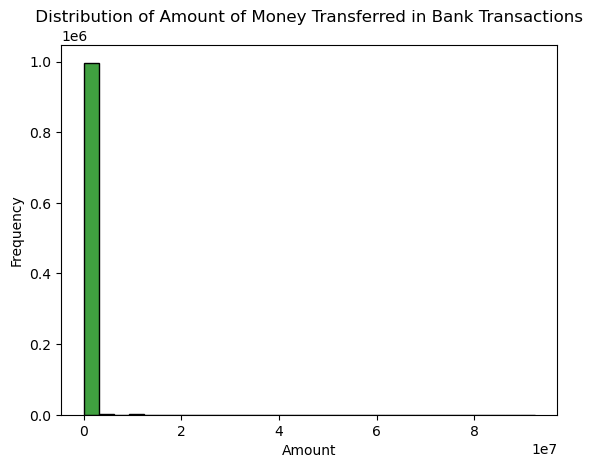

In [14]:
#Amount: The amount of money transferred
#Histogram to show distributions of Amount with outliers

#plt.figure(figsize=(10, 6))
sns.histplot(data=transactions, x = "amount", bins = 30, color= "green",  kde=False)

#plt.xlim(0, 10000000) #
#plt.xscale('log')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title(' Distribution of Amount of Money Transferred in Bank Transactions ')
plt.show() 

/opt/miniconda3/envs/ds/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


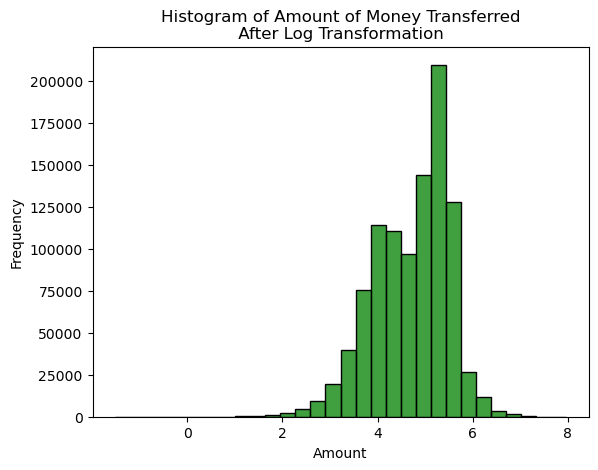

In [15]:
#Histogram to show distributions of Amount after logmitric

#trans_amount = np.log1p(transactions['amount'])
trans_amount_log = np.log10(transactions['amount'])

sns.histplot(data=trans_amount_log, bins = 30, color= "green",  kde=False)

#plt.xscale('log')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount of Money Transferred\n After Log Transformation ')
plt.show() 

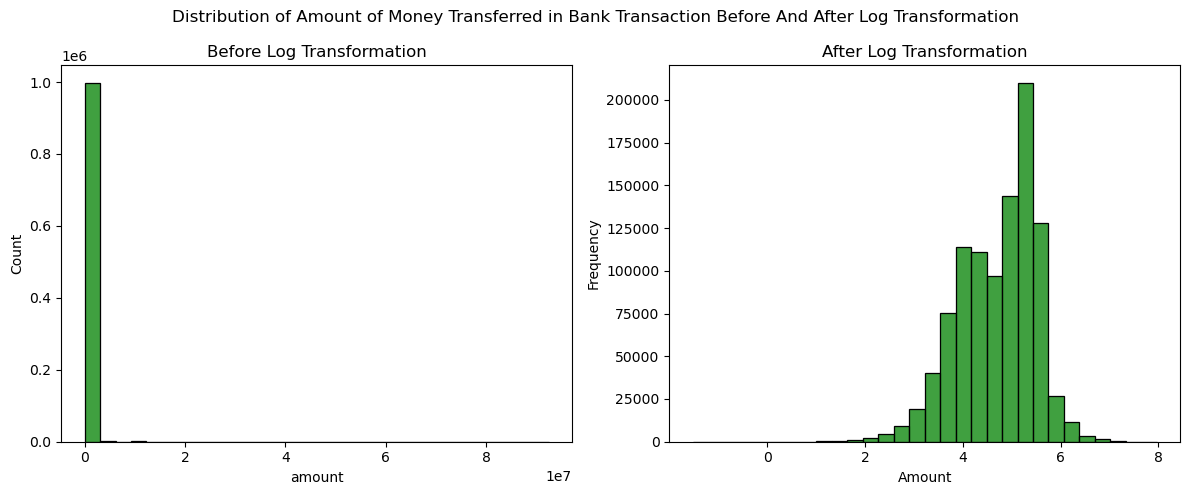

In [16]:
#The original diagram is hard to read so did a log transformation.
#When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid.
#Normal distribution because we get a better variance 


#Figure to compare before and after log transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Before log transformation
sns.histplot(data=transactions, x = "amount", bins = 30, color= "green",  kde=False, ax=axes[0])
plt.xlabel('Amount')
plt.ylabel('Frequency')
axes[0].set_title("Before Log Transformation")

#After log transformation
sns.histplot(data=trans_amount_log, bins = 30, color= "green",  kde=False, ax=axes[1])
#sns.histplot(data=trans_amount, bins = 30, color= "green",  kde=False)
plt.xlabel('Amount')
plt.ylabel('Frequency')
axes[1].set_title("After Log Transformation")


fig.suptitle("Distribution of Amount of Money Transferred in Bank Transaction Before And After Log Transformation")
plt.tight_layout()
plt.show()

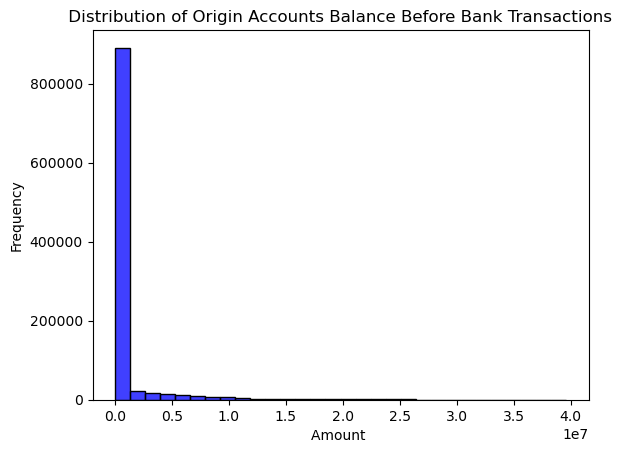

In [17]:
#OldBalanceOrg: The origin accounts balance before the transaction w/outliers
#histogram of OldBalanceOrg

sns.histplot(data=transactions, x = "oldbalanceOrg", bins = 30, color= "blue", kde=False)
#plt.xlim(0, 10000000) 
plt.xlabel('Amount ')
plt.ylabel('Frequency')
plt.title(' Distribution of Origin Accounts Balance Before Bank Transactions ')
plt.show()

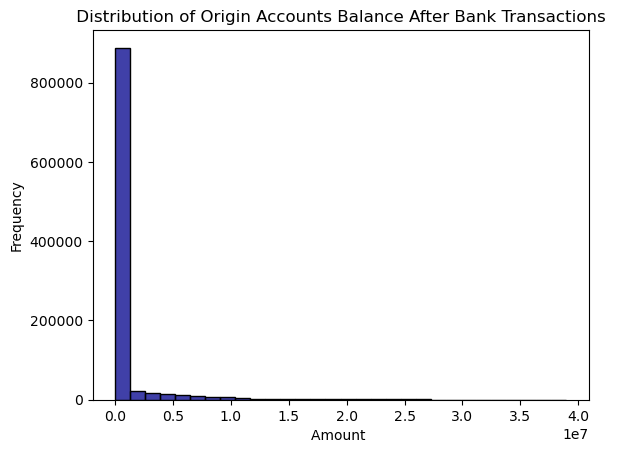

In [18]:
# NewBalanceOrig: The origin accounts balance after the transaction
#histogram of NewBalanceOrg

sns.histplot(data=transactions, x = "newbalanceOrig", bins = 30, color= "darkblue",  kde=False)
#plt.xlim(0, 10000000) 
plt.xlabel('Amount ')
plt.ylabel('Frequency')
plt.title(' Distribution of Origin Accounts Balance After Bank Transactions ')
plt.show()

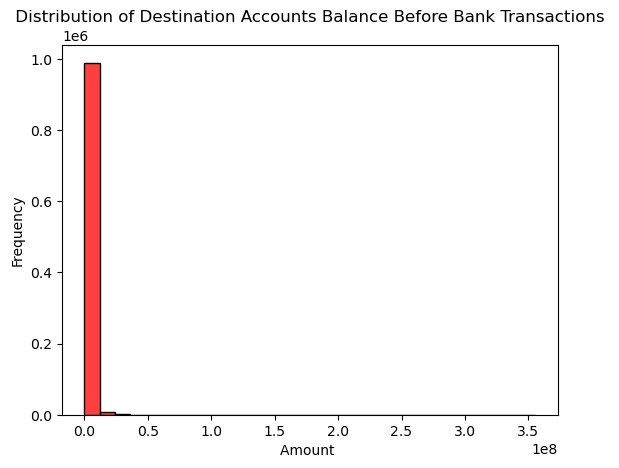

In [19]:
#OldbalanceDest: The destination accounts balance before the transaction
#histogram of OldbalanceDest

sns.histplot(data=transactions, x = "oldbalanceDest", bins = 30, color= "red",  kde=False)
#plt.xlim(0, 10000000) 
plt.xlabel('Amount ')
plt.ylabel('Frequency')
plt.title(' Distribution of Destination Accounts Balance Before Bank Transactions ')
plt.show()

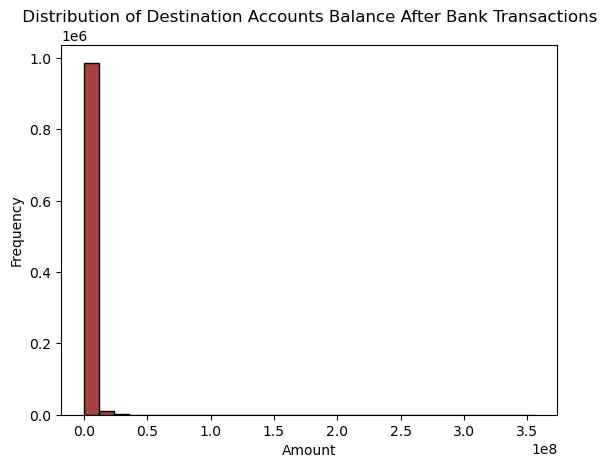

In [20]:
#NewbalanceDest: The destination accounts balance after the transaction
#histogram of NewbalanceDest

sns.histplot(data=transactions, x = "newbalanceDest", bins = 30, color= "darkred",  kde=False)
#plt.xlim(0, 10000000) 
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title(' Distribution of Destination Accounts Balance After Bank Transactions ')
plt.show()

### Bivariate Analysis

* When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?
* How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?
* Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?
* Consider how well the system's built-in fraud flag (isFlaggedFraud) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

### Question 2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.


* ZJones note: if i wanted to spend more time in this, i will add a column subtracting the differences between the new and old balances for the destination transactions 

In [21]:
#isFraud: 
#   Was this simulated transaction actually fraudulent? 
#   “fraud” to be a malicious transaction that aimed to transfer funds out of a victim’s bank account 
#   before the account owner could secure their information. (This will be your target variable)

isfraud_yes = transactions[transactions["isFraud"] == 1]
isff_yes = transactions[transactions["isFlaggedFraud"] == 1] 
isfraud_no = transactions[transactions["isFraud"] == 0]
isff_no = transactions[transactions["isFlaggedFraud"] == 0]

#Finding shape of the rows
print(f"Shape of rows with fraud: {isfraud_yes.shape}")
print(f"Shape of rows without fraud: {isfraud_no.shape}\n")
print(f"Shape of rows with flagged fraud: {isff_yes.shape}")
print(f"Shape of rows without flagged fraud: {isff_no.shape}")

Shape of rows with fraud: (1297, 8)
Shape of rows without fraud: (998703, 8)

Shape of rows with flagged fraud: (1, 8)
Shape of rows without flagged fraud: (999999, 8)


In [22]:
#Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. 
# Use visual cues to spot clusters or anomalies.

numeric_transaction = transactions.drop(["type"], axis=1)
numeric_transaction



,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,983.09,36730.24,35747.15,0.00,0.00,0,0
1,55215.25,99414.00,44198.75,0.00,0.00,0,0
2,220986.01,7773074.97,7994060.98,924031.48,703045.48,0,0
3,2357394.75,0.00,0.00,4202580.45,6559975.19,0,0
4,67990.14,0.00,0.00,625317.04,693307.19,0,0
...,...,...,...,...,...,...,...
999995,13606.07,114122.11,100516.04,0.00,0.00,0,0
999996,9139.61,0.00,0.00,0.00,0.00,0,0
999997,153650.41,50677.00,0.00,0.00,380368.36,0,0
999998,163810.52,0.00,0.00,357850.15,521660.67,0,0


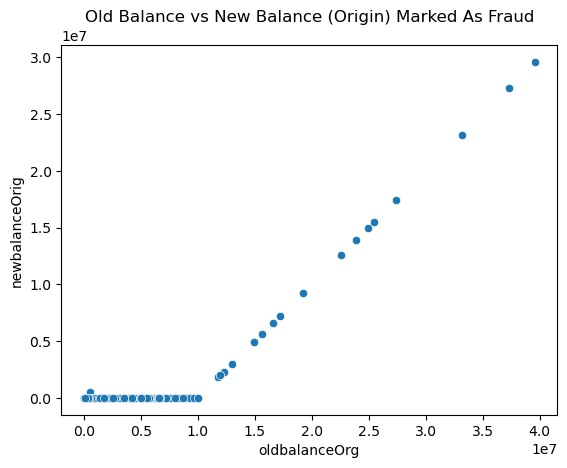

Correlation between oldbalanceOrg and newbalanceOrig: 
                 oldbalanceOrg  newbalanceOrig
oldbalanceOrg        1.000000        0.761339
newbalanceOrig       0.761339        1.000000


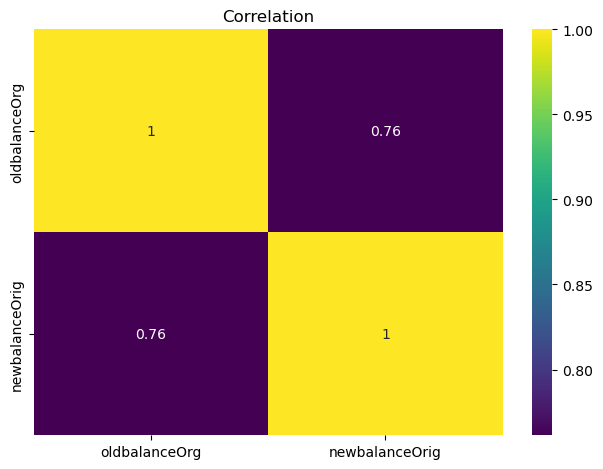

In [23]:
#looking at the ones marked as fraud seeing the difference between old and new balance Origin
sns.scatterplot(data=isfraud_yes, x="oldbalanceOrg", y="newbalanceOrig")
plt.title("Old Balance vs New Balance (Origin) Marked As Fraud")
plt.show()

#Correlation
origin_new_old_yes = isfraud_yes[["oldbalanceOrg", "newbalanceOrig"]].corr()
print(f"Correlation between oldbalanceOrg and newbalanceOrig: \n {origin_new_old_yes}")

#Correlation matrix
sns.heatmap(origin_new_old_yes, annot=True, cmap='viridis').set_title('Correlation')
plt.tight_layout()
plt.show()

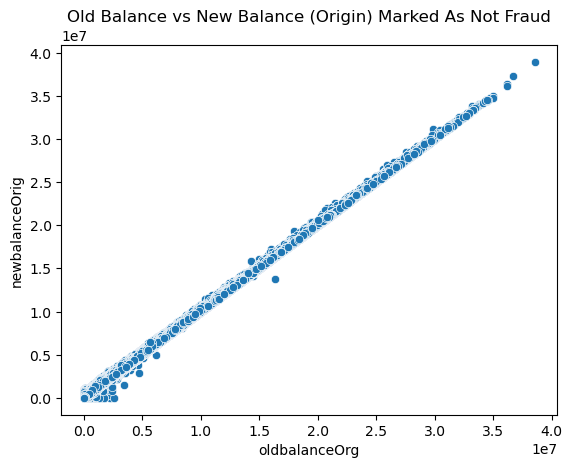

Correlation between oldbalanceOrg and newbalanceOrig: 
                 oldbalanceOrg  newbalanceOrig
oldbalanceOrg        1.000000        0.999418
newbalanceOrig       0.999418        1.000000


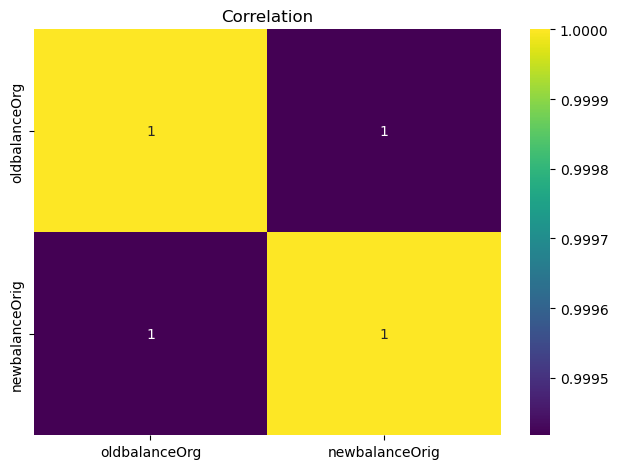

In [24]:
#looking at the ones marked as NOT fraud seeing the difference between old and new balance Origin
sns.scatterplot(data=isfraud_no, x="oldbalanceOrg", y="newbalanceOrig")
plt.title("Old Balance vs New Balance (Origin) Marked As Not Fraud")
plt.show()

#Correlation
origin_new_old_no = isfraud_no[["oldbalanceOrg", "newbalanceOrig"]].corr()
print(f"Correlation between oldbalanceOrg and newbalanceOrig: \n {origin_new_old_no}")

#Correlation matrix
sns.heatmap(origin_new_old_no, annot=True, cmap='viridis').set_title('Correlation')
plt.tight_layout()
plt.show()

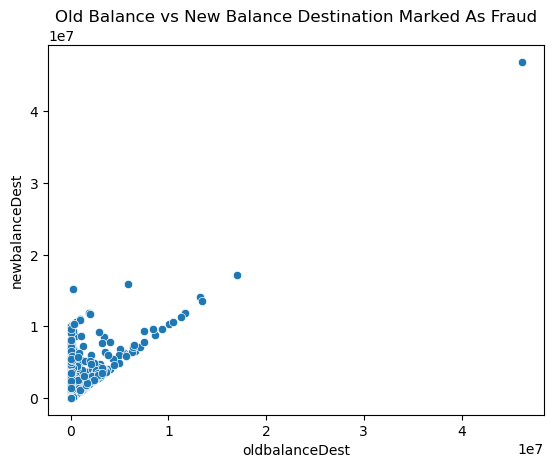

Correlation between oldbalanceDest and newbalanceDest: 
                 oldbalanceDest  newbalanceDest
oldbalanceDest        1.000000        0.739729
newbalanceDest        0.739729        1.000000


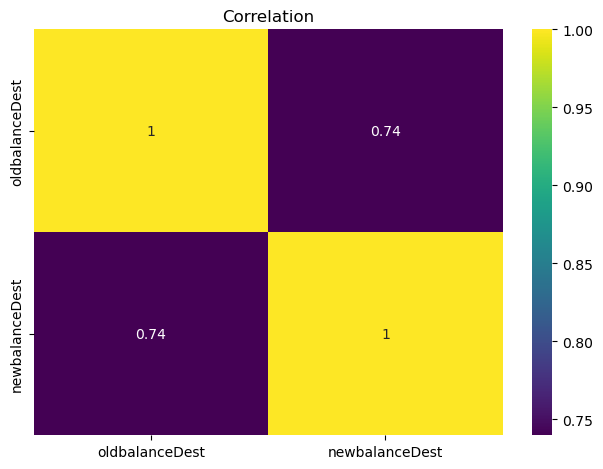

In [25]:
#Marked as fraud seeing the difference between old and new balance destination
sns.scatterplot(data=isfraud_yes, x="oldbalanceDest", y="newbalanceDest")
plt.title("Old Balance vs New Balance Destination Marked As Fraud")
plt.show()

#Correlation
new_old_yes = isfraud_yes[["oldbalanceDest", "newbalanceDest"]].corr()
print(f"Correlation between oldbalanceDest and newbalanceDest: \n {new_old_yes}")

#Correlation matrix
sns.heatmap(new_old_yes, annot=True, cmap='viridis').set_title('Correlation')
plt.tight_layout()
plt.show()

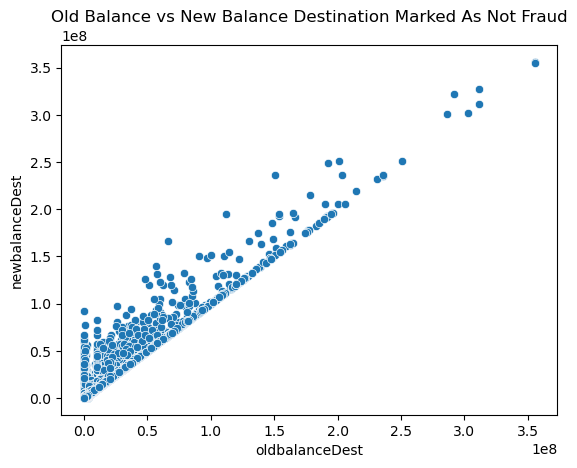

Correlation between oldbalanceDest and newbalanceDest: 
                 oldbalanceDest  newbalanceDest
oldbalanceDest        1.000000        0.975425
newbalanceDest        0.975425        1.000000


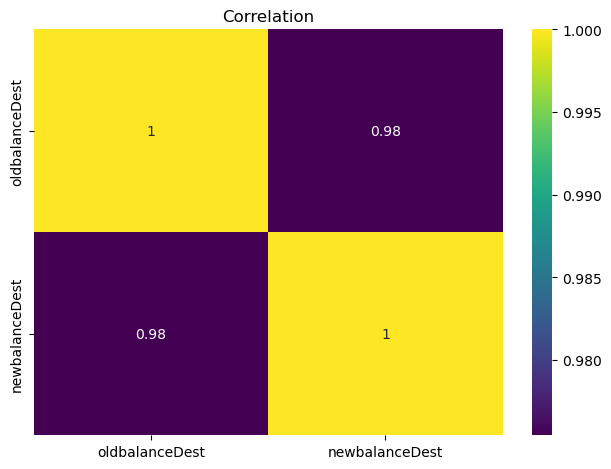

In [26]:
#Marked as NOT fraud seeing the difference between old and new balance destination
sns.scatterplot(data=isfraud_no, x="oldbalanceDest", y="newbalanceDest")
plt.title("Old Balance vs New Balance Destination Marked As Not Fraud")
plt.show()

#Correlation
new_old_no = isfraud_no[["oldbalanceDest", "newbalanceDest"]].corr()
print(f"Correlation between oldbalanceDest and newbalanceDest: \n {new_old_no}")

#Correlation matrix
sns.heatmap(new_old_no, annot=True, cmap='viridis').set_title('Correlation')
plt.tight_layout()
plt.show()

## Question 3
* How do types of transaction relate to the typical amounts involved? 
* Are some types of transactions consistently larger or smaller than others?
* **Hint**: Break the dataset down by transaction type and compare summary statistics.

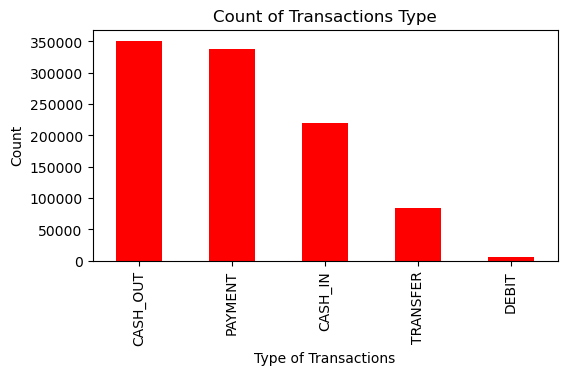

type
CASH_OUT    351360
PAYMENT     338573
CASH_IN     219955
TRANSFER     83695
DEBIT         6417
Name: count, dtype: int64

In [27]:

#Distribution of the type of bank transactions 
#Type: The type of transaction

plt.figure(figsize=(6,3))
trans_type = transactions['type'].value_counts()
trans_type.plot(kind = 'bar', color= "red")
plt.title("Count of Transactions Type")
plt.xlabel("Type of Transactions")
plt.ylabel("Count")
plt.tight_layout
plt.show()

trans_type

In [28]:
#pivot table to show the relationship between amount and type of transactions

trans_amount = transactions.groupby(by= "type").agg('mean')
display(transactions.groupby('type').agg({
    'amount': ['min', 'max', 'mean', 'median']
}))

amount                                        
            min          max           mean      median
type                                                   
CASH_IN    0.43   1609288.13  168928.914668  142942.990
CASH_OUT   0.00  10000000.00  175584.659320  146209.915
DEBIT      5.24    389762.68    5445.890813    3099.530
PAYMENT    0.03    230549.18   13055.592085    9481.670
TRANSFER   2.60  92445516.64  911827.155179  487883.710

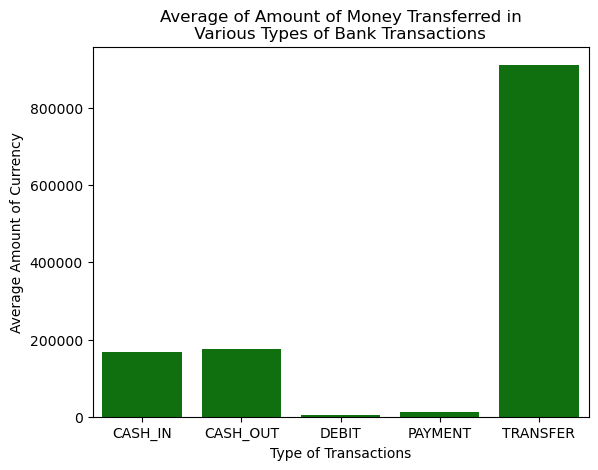

In [29]:
#Bar graph to show the relationship between type of transaction and average amount of money transferred


sns.barplot(data=trans_amount,x= "type", y = "amount", color= "green")
plt.xlabel('Type of Transactions')
plt.ylabel('Average Amount of Currency')
plt.title('Average of Amount of Money Transferred in\n Various Types of Bank Transactions ')
plt.show() 

#This makes sense because amount column means the amount of money transferred

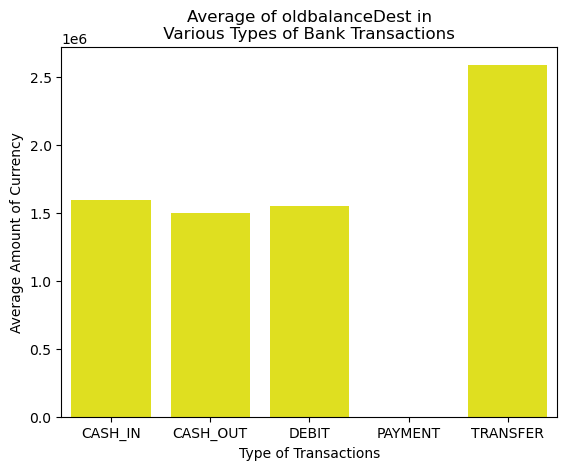

In [30]:
#Bar graph to show the relationship between type of transaction and average amount of money transferred
trans_amount = transactions.groupby(by= "type").agg('mean')

sns.barplot(data=trans_amount,x= "type", y = "oldbalanceDest", color= "yellow")
plt.xlabel('Type of Transactions')
plt.ylabel('Average Amount of Currency')
plt.title('Average of oldbalanceDest in\n Various Types of Bank Transactions ')
plt.show() 

#This makes sense because amount column means the amount of money transferred

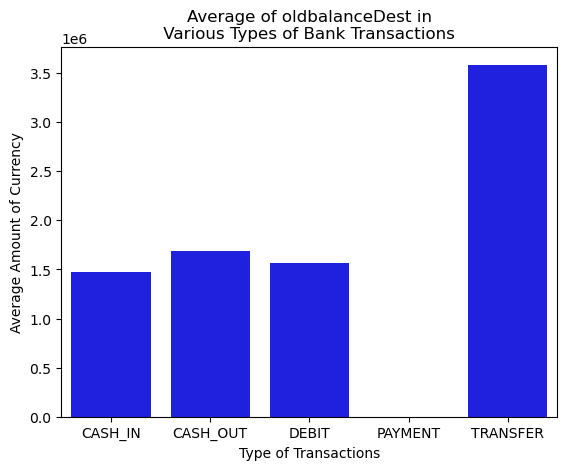

In [31]:
#Bar graph to show the relationship between type of transaction and average amount of money transferred
trans_amount = transactions.groupby(by= "type").agg('mean')

sns.barplot(data=trans_amount,x= "type", y = "newbalanceDest", color= "blue")
plt.xlabel('Type of Transactions')
plt.ylabel('Average Amount of Currency')
plt.title('Average of oldbalanceDest in\n Various Types of Bank Transactions ')
plt.show() 

#This makes sense because amount column means the amount of money transferred

### Question 4
Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

In [32]:
trans_samp_fraud = transactions.groupby(['type','isFraud']).agg('mean')
trans_samp_fraud


amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
type     isFraud                                                                
CASH_IN  0        1.689289e+05   3.596360e+06    3.765287e+06    1.590204e+06   
CASH_OUT 0        1.734277e+05   4.353512e+04    1.757501e+04    1.499650e+06   
         1        1.326971e+06   1.324727e+06    0.000000e+00    8.934110e+05   
DEBIT    0        5.445891e+03   6.942898e+04    6.595120e+04    1.552738e+06   
PAYMENT  0        1.305559e+04   6.813189e+04    6.175187e+04    0.000000e+00   
TRANSFER 0        9.081874e+05   4.023556e+04    7.463306e+03    2.607906e+06   
         1        1.384176e+06   1.699774e+06    3.164361e+05    0.000000e+00   

                  newbalanceDest  isFlaggedFraud  
type     isFraud                                  
CASH_IN  0          1.469566e+06        0.000000  
CASH_OUT 0          1.691058e+06        0.000000  
         1          2.234754e+06        0.000000  
DEBIT    0          1.569749e+06        0.000000  
PAYMENT  0          0.000000e+00        0.000000  
TRANSFER 0          3.612304e+06        0.000000  
         1          5.442266e+02        0.001563

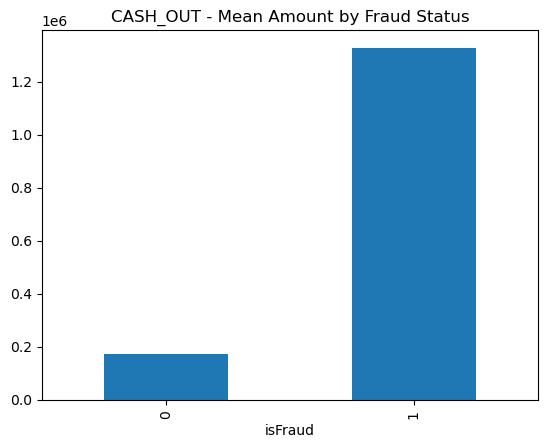

In [33]:
#Focusing on the cash_out transaction and 
# showing a graph of the average amount of monent transferred in fraudulant and non-fradulant cases

trans_samp_fraud.loc['CASH_OUT', 'amount'].plot(kind='bar')
plt.title('CASH_OUT - Mean Amount by Fraud Status')
plt.show()

#seems like the average amount of money transferred in the cash_out transactions is higher in cases where there is fraud

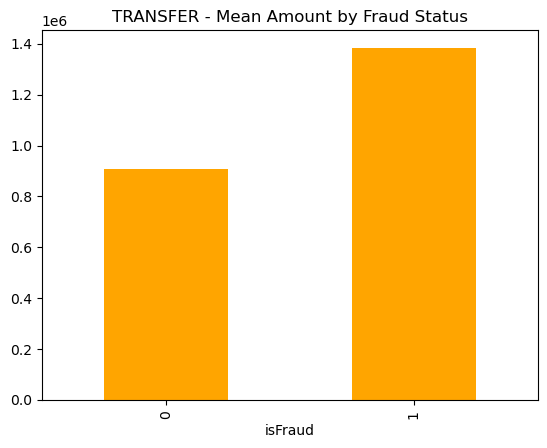

In [34]:
#Focusing on the cash_out transaction and 
# showing a graph of the average amount of monent transferred in fraudulant and non-fradulant cases
trans_samp_fraud.loc['TRANSFER', 'amount'].plot(kind='bar', color = 'orange')
plt.title('TRANSFER - Mean Amount by Fraud Status')
plt.show()

#seems like the average amount of money transferred in the transfer transactions is higher in cases where there is fraud

### Question 5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

In [35]:
#isFraud: 
#   Was this simulated transaction actually fraudulent? 
#   “fraud” to be a malicious transaction that aimed to transfer funds out of a victim’s bank account 
#   before the account owner could secure their information. (This will be your target variable)

isfraud_yes = transactions[transactions["isFraud"] == 1]
isff_yes = transactions[transactions["isFlaggedFraud"] == 1] 
isfraud_no = transactions[transactions["isFraud"] == 0]
isff_no = transactions[transactions["isFlaggedFraud"] == 0]

#Finding shape of the rows
print(f"Shape of rows with fraud: {isfraud_yes.shape}")
print(f"Shape of rows without fraud: {isfraud_no.shape}\n")
print(f"Shape of rows with flagged fraud: {isff_yes.shape}")
print(f"Shape of rows without flagged fraud: {isff_no.shape}\n")

supposeToBeFlagged = isfraud_yes[isfraud_yes['amount']> 200000]
print(f"Shape of the values that are fradulent and over 200000 {supposeToBeFlagged.shape}") #so 852 rows should gave been flagged fradulent


Shape of rows with fraud: (1297, 8)
Shape of rows without fraud: (998703, 8)

Shape of rows with flagged fraud: (1, 8)
Shape of rows without flagged fraud: (999999, 8)

Shape of the values that are fradulent and over 200000 (852, 8)


In [36]:
#IsFlaggedFraud: A “naive” model that simply flags a transaction as fraudulent if it is greater than 200,000 
# (note that this currency is not USD)
isff_yes = transactions[transactions["isFlaggedFraud"] == 1] 
isff_yes





,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
564103,TRANSFER,536624.41,536624.41,536624.41,0.0,0.0,1,1


In [37]:
# This looks at what isFlaggedFraud should have flagged when comparing "amount" with "isfraud" and "isFlaggedFraud"

supposeFlagged = transactions[transactions['amount']> 200000] #if transactions is greater than 200000, it is suppose to be flagged
print(f"Shape of the values suppose to be flagged {supposeFlagged.shape}")
supposeFlagged = supposeFlagged[supposeFlagged['isFraud'] == 1] 
print(f"Shape of the values that are fradulent and over 200000 {supposeFlagged.shape}") #so 852 rows should gave been flagged fradulent
#supposeFlagged["isFlaggedFraud"].value_counts()
supposeFlagged[["isFraud"]]

Shape of the values suppose to be flagged (262434, 8)
Shape of the values that are fradulent and over 200000 (852, 8)


,isFraud
439,1
982,1
1084,1
1903,1
1912,1
...,...
995036,1
997527,1
997654,1
998488,1


In [38]:
transactions['supposeToBeFlagged'] = (
    (transactions['isFraud'] == 1) & 
    (transactions['amount'] > 200000)
).astype(int)

transactions

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,supposeToBeFlagged
0,PAYMENT,983.09,36730.24,35747.15,0.00,0.00,0,0,0
1,PAYMENT,55215.25,99414.00,44198.75,0.00,0.00,0,0,0
2,CASH_IN,220986.01,7773074.97,7994060.98,924031.48,703045.48,0,0,0
3,TRANSFER,2357394.75,0.00,0.00,4202580.45,6559975.19,0,0,0
4,CASH_OUT,67990.14,0.00,0.00,625317.04,693307.19,0,0,0
...,...,...,...,...,...,...,...,...,...
999995,PAYMENT,13606.07,114122.11,100516.04,0.00,0.00,0,0,0
999996,PAYMENT,9139.61,0.00,0.00,0.00,0.00,0,0,0
999997,CASH_OUT,153650.41,50677.00,0.00,0.00,380368.36,0,0,0
999998,CASH_OUT,163810.52,0.00,0.00,357850.15,521660.67,0,0,0


In [39]:
#pivot table

pivot = transactions.pivot_table(index= ['isFraud','supposeToBeFlagged'],columns='isFlaggedFraud', values='amount', 
aggfunc='count', fill_value=0)

pivot



isFlaggedFraud                   0  1
isFraud supposeToBeFlagged           
0       0                   998703  0
1       0                      445  0
        1                      851  1

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

* All the numeric features in our data set have a right skewed distribution showing that most transactions involve lower amounts of money. 
* Because it was skewed so much, I did log transformation on the data set to try to get a normal distribution because we get a better variance. I concluded that a lot of the mean was concentrated between 40,000,000 and 60,000,000 currency when looking at amount, old balance origin, and new balance origin. For new balance destination, and old balance destiantion, a lot of the mean was concentreated at 60,000,000.

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

* When comparing fraud status based on origin old and new balances, the graph marked as fraud has a lot of data points clustered where new balance is closer to 0. Thus, we can assume that often the account is drained to zero. The correlation between new balance and old balance with fraudulent activity is 0.73. The correlation bewteen new balance and old balance without fraud is 0.999418 thus showing that normal activty will have a strong correlation, and consistent relationship between oldBalanceOrg and newbalanceOrg.

* When comparing fraud status based on destination old and new balances, the graph marked as fradulant has clustured data points between 0 and 1. The graph with fraudulent activity has a correlation of .74. On the contray, the transacations without fraudulent activity show a linear relationship and shows more variance in balance values, likely because real transactions involve a broader range of account types and amounts. The correlation between destination old and new balanceswithout fraud is .98.



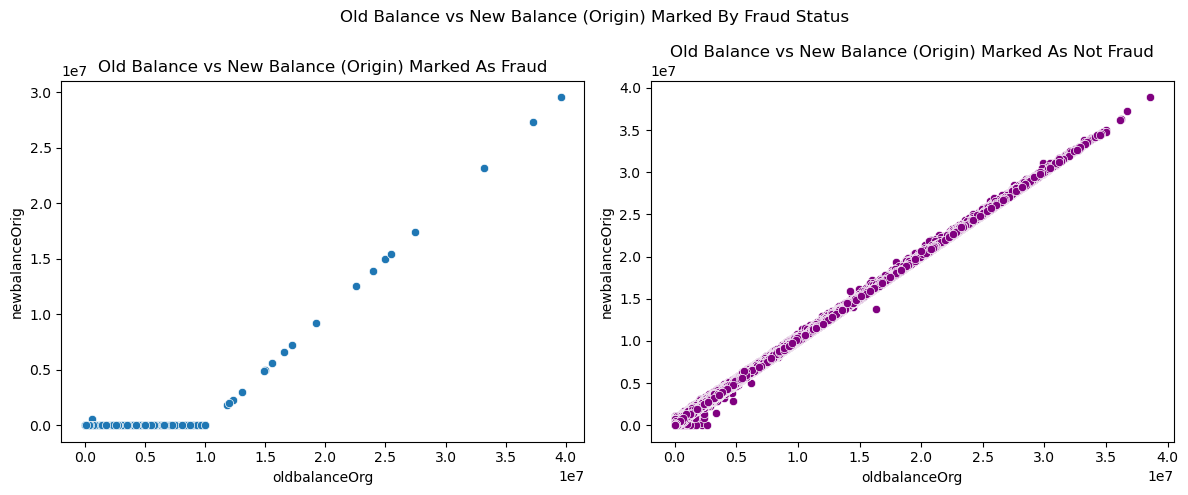

In [40]:
# Create figure and axes to show Fraud Vs NOT Fraud
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#looking at the ones marked as fraud seeing the difference between old and new balance Origin
sns.scatterplot(data=isfraud_yes, x="oldbalanceOrg", y="newbalanceOrig",ax=axes[0])
axes[0].set_title("Old Balance vs New Balance (Origin) Marked As Fraud")


#looking at the ones marked as NOT fraud seeing the difference between old and new balance Origin
sns.scatterplot(data=isfraud_no, x="oldbalanceOrg", y="newbalanceOrig",ax=axes[1], color = "purple")
axes[1].set_title("Old Balance vs New Balance (Origin) Marked As Not Fraud")

fig.suptitle("Old Balance vs New Balance (Origin) Marked By Fraud Status")
plt.tight_layout()
plt.show()

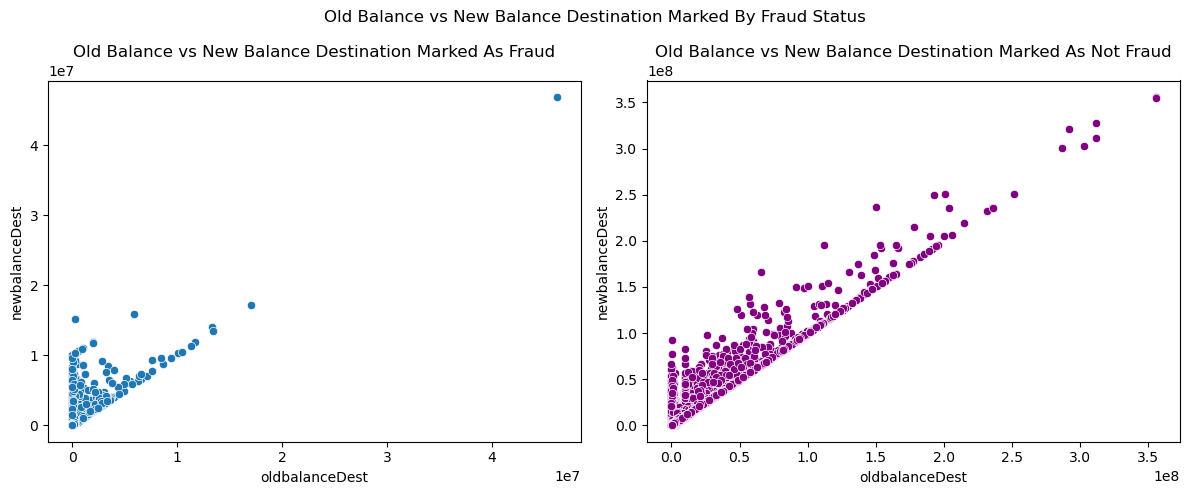

In [41]:
# Create figure and axes to show Fraud Vs NOT Fraud
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Marked as fraud seeing the difference between old and new balance destination
sns.scatterplot(data=isfraud_yes, x="oldbalanceDest", y="newbalanceDest",ax=axes[0])
axes[0].set_title("Old Balance vs New Balance Destination Marked As Fraud")

#Marked as NOT fraud seeing the difference between old and new balance destination
sns.scatterplot(data=isfraud_no, x="oldbalanceDest", y="newbalanceDest",ax=axes[1],color = "purple")
axes[1].set_title("Old Balance vs New Balance Destination Marked As Not Fraud")

fig.suptitle("Old Balance vs New Balance Destination Marked By Fraud Status")
plt.tight_layout()
plt.show()

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

* The most popular transaction type is cash out with 351360 transactions. Next, popular transaction type is payment with 338573 transactions. Then cash-in with 219955 transactions. Transfer had 83695 transactions. Debit has the lowest number of transactions.

* The transfer transaction has the most amount of money on average with 911827.16 in currency. There is a wide gap between transfer transactions and the next two highest average transaction type. Cash out transaction type has an average of the amount of 175584.67 and cash in transaction type closely follows with an average of 168928.91.

* The transfer transactions are consistently having bigger ammounts on average. 

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

* The only transaction types with instances of fraud are cash out and transfer bank transactions. The average amount of money transferred in both od these transaction types is higher in cases where there is fraud. 
* In cash out transactions, where there isn't fraud, the average amount of money is 1.734277e+05. But in cash out transactions, where there is fraud, the average amount of money is 1.326971e+06.
* In cash-out transactions, the average of the oldbalanceOrg for fraudulent transaction is 1.324727e+06. But the average of the newbalanceOrg for fradulent transaction is 0. This suggests that these frauds involve draining the entire balance from the origin account. 
* In fradulent transfer transactions, the average of oldbalanceDest is 0 while newbalanceDest has an average of 
5.442266e+02. This suggests that the receiving accounts are likely newly created and that the scammers are transferring money into fresh accounts. 

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

* The system's current fraud flagging (isFlaggedFraud) does not align well with actual fraudulent activity (isFraud). 
* There is only 1 row with isFlaggedFraud being marked 1 out of a million transactions. 
* The built in fraud flag is suppose to be flag cases where the amount is over 200,000.
* However, there are 1297 rows with isFraud is detected but there are 852 rows where fraud is detected AND the amount is over 200,000 meaning 852 rows should have been flagged.
* Of the 1,297 transactions that are confirmed as fraudulent, 445 have amounts below 200,000 and therefore would not be flagged by the current system, even though they are fraudulent.

In [42]:
pivot

isFlaggedFraud                   0  1
isFraud supposeToBeFlagged           
0       0                   998703  0
1       0                      445  0
        1                      851  1